# Dimension Reduction

## Data Collection

Data: 
   The university details are obtained from the US Higher Education Body and is publicly available for students to access.

Data Dictionary:
- Dataset contains 25 university details
- 7 features are recorded for each university

Description:
- Univ - University Name
- State - Location (state) of the university
- SAT - Average SAT score for eligibility
- Top10 - % of students who ranked in top 10 in their previous academics
- Accept - % of students admitted to the universities
- SFRatio - Student to Faculty ratio
- Expenses - Overall cost in USD
- GradRate - % of students who graduate

#### Install the required packages if not available

In [4]:
# !pip install feature_engine
# !pip install dtale

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import TruncatedSVD
from kneed import KneeLocator

### Suppress the Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [3]:
df = pd.read_excel(r"C:\Users\Swapnil Mishra\Desktop\DS_Codes_Swapnil\SVD\University_Clustering\University_Clustering.xlsx")
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [5]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


# Data Preprocessing

In [6]:
# Drop the unwanted features
df1 = df.drop(["UnivID"], axis = 1)
df1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


## Checking Null Values

In [8]:
df1.isnull().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

### SVD can be implemented on Numeric features

In [9]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [10]:
numeric_features

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

## Define the Pipeline steps

#### Define SVD model

In [12]:
svd = TruncatedSVD(n_components = 5)
# Can also be used in sparse (i.e zeros present in) dataset

## Make Pipeline

**By using Mean imputation null values can be impute**

**Data has to be standardized to address the scale difference**

In [13]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), svd)

In [14]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df1[numeric_features]) 

In [15]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=5))])

In [16]:
# Apply the pipeline on the dataset
univ = pd.DataFrame(processed.transform(df1[numeric_features]))

univ

,0,1,2,3,4
0,-1.008824,-1.069154,0.078815,0.053320,-0.124905
1,-2.822327,2.252320,0.844907,0.136340,-0.091849
2,1.112562,1.626748,-0.256960,1.080296,-0.175069
3,-0.683955,0.031322,0.150691,-0.081396,-0.627660
4,-0.310925,-0.640049,0.006737,0.165489,0.018108
5,-1.695867,-0.348666,-0.255731,0.009171,-0.055605
6,-1.245805,-0.496317,-0.043130,-0.218671,0.290790
7,-0.389018,-0.782644,-0.464465,0.064073,-0.549292
8,-2.373384,-0.392515,0.112782,-0.452592,-0.243764
9,-1.402687,2.116496,-0.446030,-0.641238,0.218553


## Save the End to End SVD pipeline with Imputation and Standardization

In [17]:
import joblib

joblib.dump(processed, 'svd_DimRed')

['svd_DimRed']

In [18]:
import os 
os.getcwd()

'C:\\Users\\Swapnil Mishra\\Desktop\\DS_Codes_Swapnil\\SVD\\SVD'

## Import the pipeline

In [19]:
model = joblib.load("svd_DimRed")

In [20]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=5))])

## Apply the saved model on to the Dataset to extract PCA values

In [21]:
svd_res = pd.DataFrame(model.transform(df1[numeric_features]))

svd_res

,0,1,2,3,4
0,-1.008824,-1.069154,0.078815,0.053320,-0.124905
1,-2.822327,2.252320,0.844907,0.136340,-0.091849
2,1.112562,1.626748,-0.256960,1.080296,-0.175069
3,-0.683955,0.031322,0.150691,-0.081396,-0.627660
4,-0.310925,-0.640049,0.006737,0.165489,0.018108
5,-1.695867,-0.348666,-0.255731,0.009171,-0.055605
6,-1.245805,-0.496317,-0.043130,-0.218671,0.290790
7,-0.389018,-0.782644,-0.464465,0.064073,-0.549292
8,-2.373384,-0.392515,0.112782,-0.452592,-0.243764
9,-1.402687,2.116496,-0.446030,-0.641238,0.218553


# SVD for Feature Extraction

In [22]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.Univ, svd_res.iloc[:, 0:3]], axis = 1)
final.columns = ['Univ', 'svd0', 'svd1', 'svd2']
final

,Univ,svd0,svd1,svd2
0,Brown,-1.008824,-1.069154,0.078815
1,CalTech,-2.822327,2.252320,0.844907
2,CMU,1.112562,1.626748,-0.256960
3,Columbia,-0.683955,0.031322,0.150691
4,Cornell,-0.310925,-0.640049,0.006737
5,Dartmouth,-1.695867,-0.348666,-0.255731
6,Duke,-1.245805,-0.496317,-0.043130
7,Georgetown,-0.389018,-0.782644,-0.464465
8,Harvard,-2.373384,-0.392515,0.112782
9,JohnsHopkins,-1.402687,2.116496,-0.446030


0     Text(-1.008823681863963, -1.0691538769881204, ...
1     Text(-2.822326558999183, 2.2523202038226855, '...
2     Text(1.112561630366096, 1.6267483806870147, 'C...
3     Text(-0.6839552605503277, 0.03132174701492108,...
4     Text(-0.3109245041758678, -0.640048603093425, ...
5     Text(-1.6958668099846914, -0.34866586849687486...
6     Text(-1.2458054535709064, -0.49631688159232923...
7     Text(-0.389018275015203, -0.7826436177031605, ...
8     Text(-2.373384294420652, -0.3925147946430438, ...
9     Text(-1.4026874914304313, 2.116496488946327, '...
10    Text(-1.7256378326780721, 0.081014502958528, '...
11    Text(-0.4499242233205668, -0.01498705112450456...
12    Text(0.04139659881371562, -1.01373303538705, '...
13    Text(3.2354389403840065, -0.3743761890622635, ...
14    Text(-2.235686952227565, -0.37546499205466877,...
15    Text(5.174524534636292, 0.7782961511779161, 'P...
16    Text(-1.6988262921827848, -0.31154757771096436...
17    Text(4.57973355331519, -0.354186618232482,

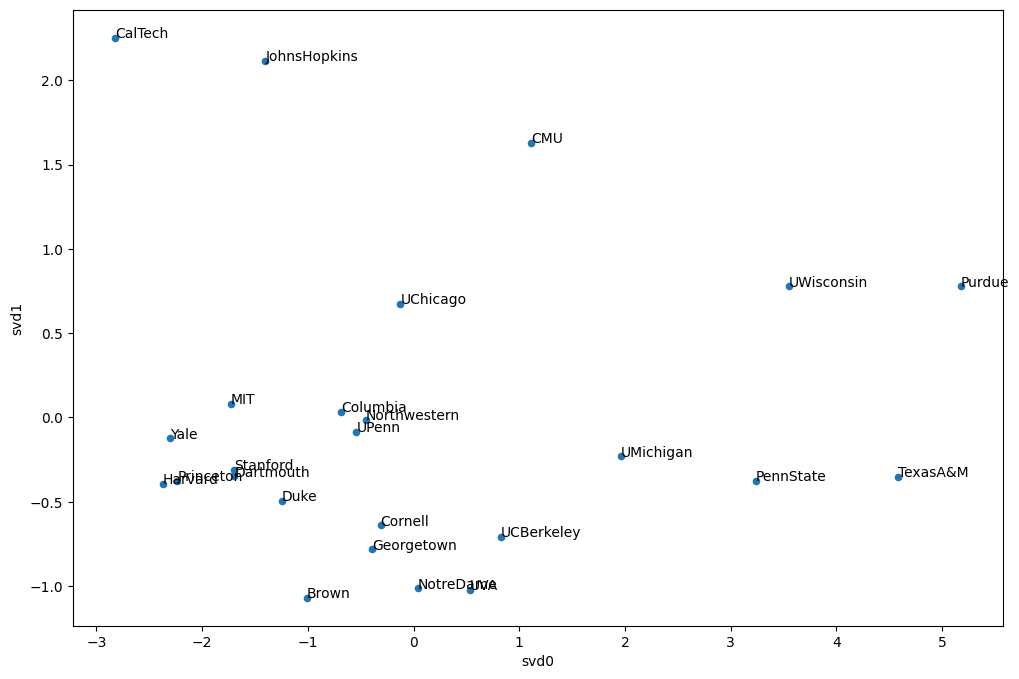

In [23]:
# Scatter diagram
ax = final.plot(x = 'svd0', y = 'svd1', kind = 'scatter', figsize = (12, 8))
final[['svd0', 'svd1', 'Univ']].apply(lambda x: ax.text(*x), axis = 1)

# Prediction on new data

In [24]:
newdf = pd.read_excel(r"C:\Users\Swapnil Mishra\Desktop\DS_Codes_Swapnil\SVD\University_Clustering\new_Univ_4_pred.xlsx")

newdf

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,26,UWashington,NY,1280.0,83.0,33.0,13.0,21864.0,90.0
1,27,UCalifornia,CA,1340.0,89.0,23.0,10.0,32162.0,95.0
2,28,Santa Barbara,NC,1315.0,90.0,30.0,NaN,31585.0,95.0
3,29,UMaryland,DC,NaN,74.0,24.0,12.0,20126.0,92.0
4,30,Rice University,MA,1400.0,91.0,NaN,11.0,39525.0,NaN
5,31,UMiami,MD,1305.0,75.0,44.0,7.0,58691.0,87.0
6,32,UVirginia,MA,1380.0,NaN,30.0,10.0,34870.0,91.0
7,33,Indiana University Kokomo,IL,1260.0,85.0,39.0,11.0,NaN,89.0
8,34,University at Buffalo,IN,1255.0,81.0,42.0,13.0,15122.0,94.0


In [25]:
# Drop the unwanted features
newdf1 = newdf.drop(["UnivID"], axis = 1)

In [26]:
num_feat = newdf1.select_dtypes(exclude = ['object']).columns
num_feat

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [27]:
new_res = pd.DataFrame(model.transform(newdf1[num_feat]))

new_res

,0,1,2,3,4
0,-0.310925,-0.640049,0.006737,0.165489,0.018108
1,-1.695867,-0.348666,-0.255731,0.009171,-0.055605
2,-1.176329,-0.573581,0.063394,-0.309534,0.303622
3,-0.389018,-0.782644,-0.464465,0.064073,-0.549292
4,-1.378941,0.622546,0.518625,0.123536,0.424306
5,-1.402687,2.116496,-0.446030,-0.641238,0.218553
6,-1.332604,0.266357,-0.289792,-0.078167,-0.231197
7,-0.432897,-0.044802,-0.190022,0.252927,0.272037
8,0.041397,-1.013733,-0.510428,0.215909,0.441974
